In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import datetime
import seaborn as sns
from datetime import date

In [2]:
train = pd.read_csv("Data/train_users.csv")
test = pd.read_csv("Data/test_users.csv")

In [3]:
print('the columns name of training dataset:\n',train.columns)
print('the columns name of test dataset:\n',test.columns)

the columns name of training dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
the columns name of test dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


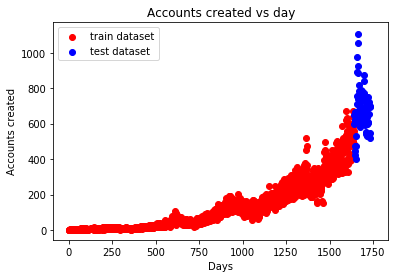

In [4]:
dac_train = train.date_account_created.value_counts()
dac_test = test.date_account_created.value_counts()
# change data to datetime type
dac_train_date = pd.to_datetime(train.date_account_created.value_counts().index)
dac_test_date = pd.to_datetime(test.date_account_created.value_counts().index)
# Calculate the number of days from the registration time of the first registered user in the training set
dac_train_day = dac_train_date - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()

plt.scatter(dac_train_day.days, dac_train.values, color = 'r', label = 'train dataset')
plt.scatter(dac_test_day.days, dac_test.values, color = 'b', label = 'test dataset')

plt.title("Accounts created vs day")
plt.xlabel("Days")
plt.ylabel("Accounts created")
plt.legend(loc = 'upper left')

In [5]:
tfa_train_dt = train.timestamp_first_active.astype(str).apply(lambda x:  
                                                                    datetime.datetime(int(x[:4]),
                                                                                      int(x[4:6]), 
                                                                                      int(x[6:8]), 
                                                                                      int(x[8:10]), 
                                                                                      int(x[10:12]),
                                                                                      int(x[12:])))
print(tfa_train_dt.describe())

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object


In [6]:
print(train.date_first_booking.describe())
print(test.date_first_booking.describe())

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_first_booking, dtype: float64


In [7]:
print(train.age.value_counts().head())

30.0    6124
31.0    6016
29.0    5963
28.0    5939
32.0    5855
Name: age, dtype: int64


Text(0, 0.5, 'counts')

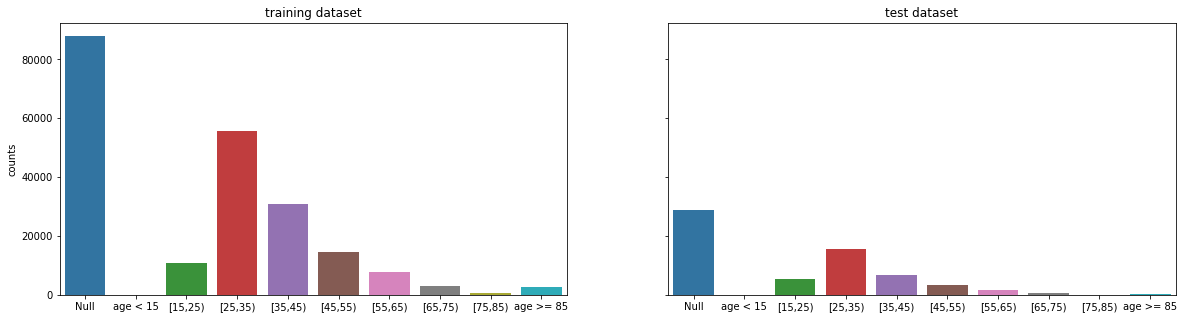

In [8]:
# Divide age into 10 groups
age_train =[train[train.age.isnull()].age.shape[0],
            train.query('age < 15').age.shape[0],
            train.query('age >= 15 & age <25').age.shape[0],
            train.query('age >= 25 & age <35').age.shape[0],
            train.query('age >= 35 & age <45').age.shape[0],
            train.query('age >= 45 & age <55').age.shape[0],
            train.query("age >= 55 & age <65").age.shape[0],
            train.query("age >= 65 & age <75").age.shape[0],
            train.query("age >= 75 & age <85").age.shape[0],
            train.query('age >= 85').age.shape[0]]

age_test = [test[test.age.isnull()].age.shape[0],
            test.query('age < 15').age.shape[0],
            test.query('age >= 15 & age <25').age.shape[0],
            test.query('age >= 25 & age <35').age.shape[0],
            test.query('age >= 35 & age <45').age.shape[0],
            test.query('age >= 45 & age <55').age.shape[0],
            test.query("age >= 55 & age <65").age.shape[0],
            test.query("age >= 65 & age <75").age.shape[0],
            test.query("age >= 75 & age <85").age.shape[0],
            test.query('age >= 85').age.shape[0]]

columns = ['Null', 'age < 15', '[15,25)','[25,35)','[35,45)','[45,55)','[55,65)','[65,75)','[75,85)', 'age >= 85']

# plot
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey = True,figsize=(20,5))

sns.barplot(columns, age_train, ax = ax1)
sns.barplot(columns, age_test, ax = ax2)

ax1.set_title('training dataset')
ax2.set_title('test dataset')
ax1.set_ylabel('counts')

In [9]:
def feature_barplot(feature, df_train = train, df_test = test, figsize=(10,5), rot = 90, saveimg = True): 
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    fig_feature, (axis1,axis2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)
    sns.barplot(feat_train.index.values, feat_train.values, ax = axis1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = axis2)
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis2.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis1.set_title(feature + ' of training dataset')
    axis2.set_title(feature + ' of test dataset')
    axis1.set_ylabel('Counts')
    plt.tight_layout()
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

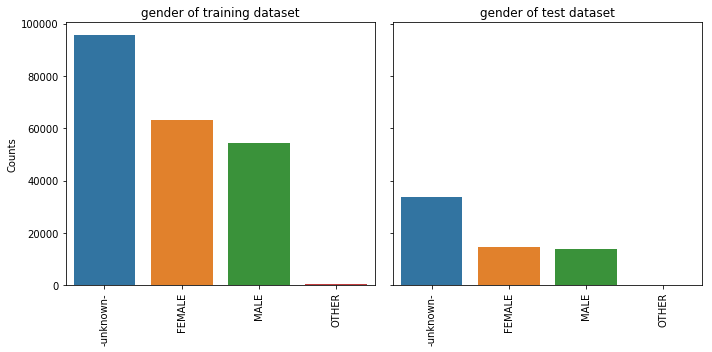

In [10]:
feature_barplot('gender', saveimg = True)

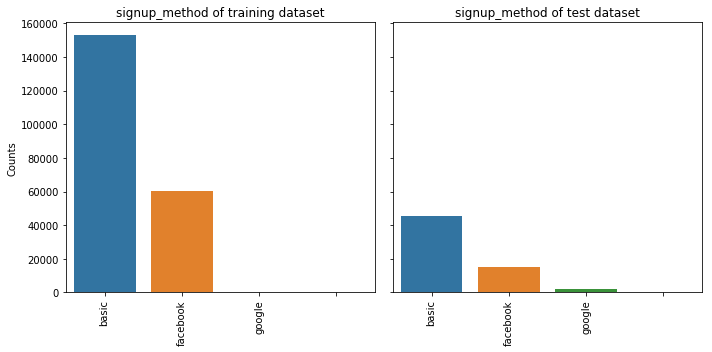

In [11]:
feature_barplot('signup_method')

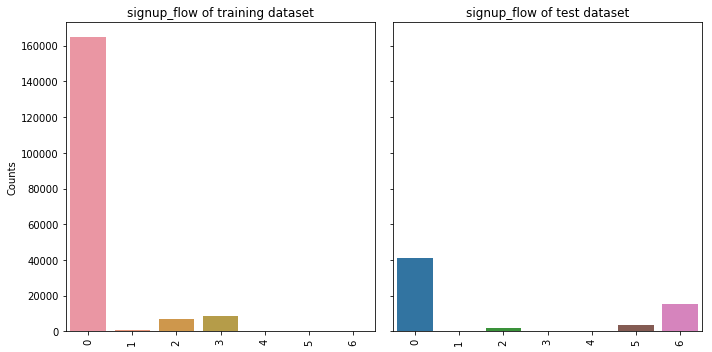

In [12]:
feature_barplot('signup_flow')

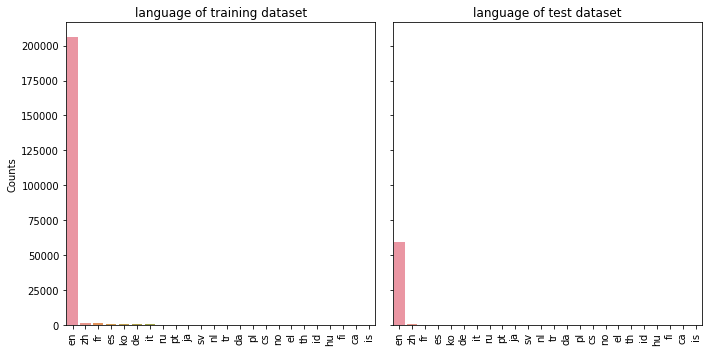

In [13]:
feature_barplot('language')

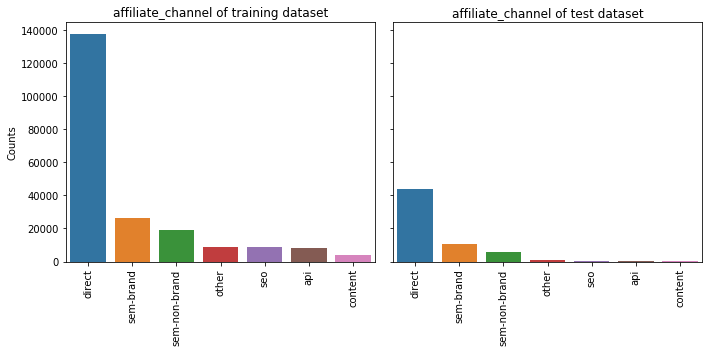

In [14]:
feature_barplot('affiliate_channel')

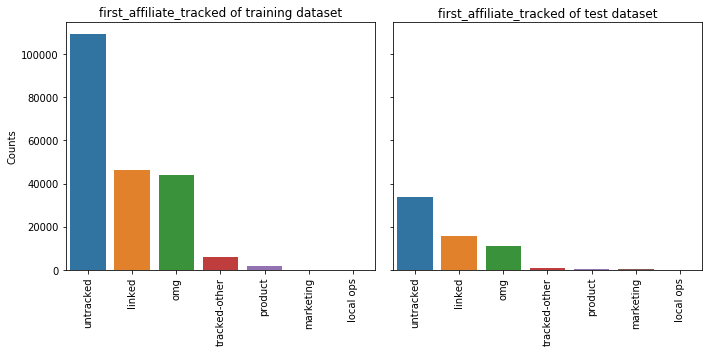

In [15]:
feature_barplot('first_affiliate_tracked')

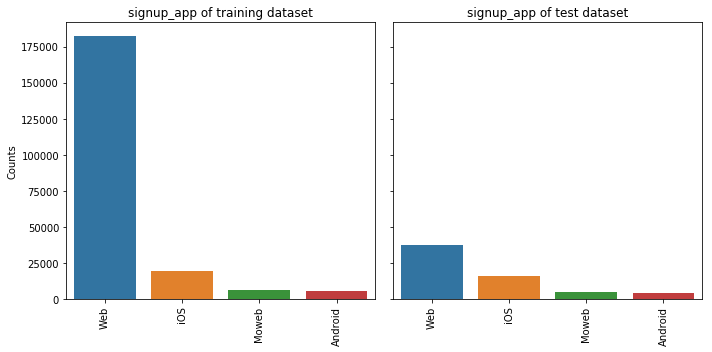

In [16]:
feature_barplot('signup_app')

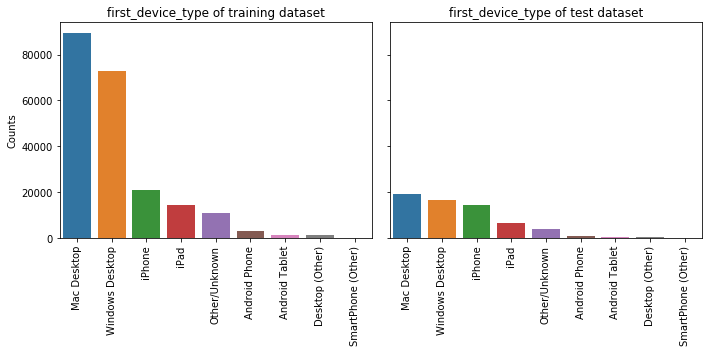

In [17]:
feature_barplot('first_device_type')

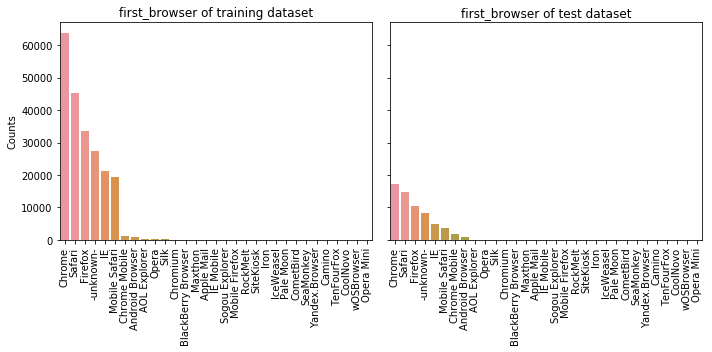

In [18]:
feature_barplot('first_browser')

In [19]:
def label_barplot(feature, df_train = train, figsize=(10,5), rot = 90, saveimg = False): 
    feat_train = df_train[feature].value_counts()
    fig = plt.figure(figsize=(8,4))
    sns.barplot(feat_train.index.values, feat_train.values)
    plt.title(feature + ' of training dataset')
    plt.ylabel('Counts')
    plt.tight_layout()
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

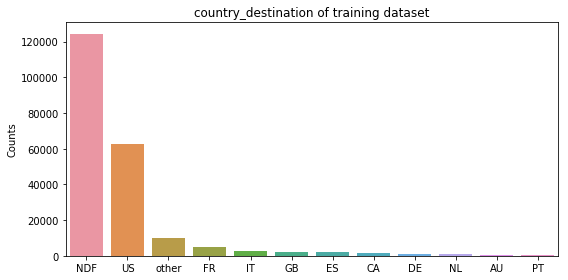

In [20]:
label_barplot('country_destination')